In [ ]:
from collections import Counter

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

---

## Collect Data

* [Keras MNIST Dataset](https://keras.io/api/datasets/mnist/)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


## Create Neural Net

* [Keras MNIST Convolutional Neural Network](https://keras.io/examples/vision/mnist_convnet/)

In [ ]:
num_classes = 10

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Bad Params

In [ ]:
# Model / data parameters
input_shape = (28, 28, 1)

batch_size = 64
epochs = 5

model_0 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(rate=0.25),
        layers.Flatten(),
        layers.Dense(units=4, activation="softmax"),
        layers.Dropout(0.5),
        layers.Dense(units=num_classes, activation="softmax"),
    ]
)

model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0

In [ ]:
model_0.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])
results_0 = model_0.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 15s 4ms/step - loss: 2.3257 - accuracy: 0.1064 - val_loss: 2.3081 - val_accuracy: 0.1050
Epoch 2/5
844/844 [==============================] - 3s 4ms/step - loss: 2.3245 - accuracy: 0.1081 - val_loss: 2.3075 - val_accuracy: 0.1050
Epoch 3/5
844/844 [==============================] - 3s 4ms/step - loss: 2.3243 - accuracy: 0.1045 - val_loss: 2.3069 - val_accuracy: 0.1050
Epoch 4/5
844/844 [==============================] - 4s 4ms/step - loss: 2.3235 - accuracy: 0.1061 - val_loss: 2.3063 - val_accuracy: 0.1050
Epoch 5/5
844/844 [==============================] - 4s 4ms/step - loss: 2.3223 - accuracy: 0.1059 - val_loss: 2.3056 - val_accuracy: 0.1050


In [ ]:
score = model_0.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.304680347442627
Test accuracy: 0.11349999904632568


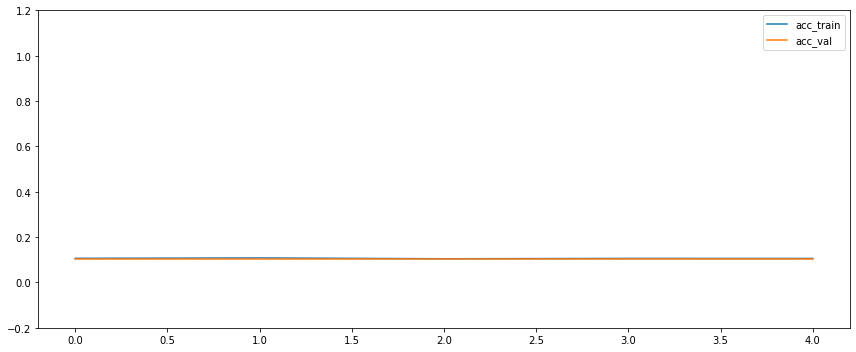

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(results_0.epoch, results_0.history["accuracy"], label="acc_train")
plt.plot(results_0.epoch, results_0.history["val_accuracy"], label="acc_val")

plt.ylim(-0.2, 1.2)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

### New Params

In [ ]:
# Model / data parameters
input_shape = (28, 28, 1)
num_classes = 10

batch_size = 128
epochs = 64

model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(units=num_classes, activation="softmax"),
    ]
)

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor="loss", patience=3)

model_1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

results_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size, epochs=epochs,
    validation_split=0.1,
    callbacks=[callback],
    verbose=1
)

Epoch 1/64
422/422 [==============================] - 3s 6ms/step - loss: 0.3719 - accuracy: 0.8867 - val_loss: 0.0838 - val_accuracy: 0.9762
Epoch 2/64
422/422 [==============================] - 2s 5ms/step - loss: 0.1143 - accuracy: 0.9646 - val_loss: 0.0581 - val_accuracy: 0.9842
Epoch 3/64
422/422 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0455 - val_accuracy: 0.9882
Epoch 4/64
422/422 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9773 - val_loss: 0.0437 - val_accuracy: 0.9892
Epoch 5/64
422/422 [==============================] - 2s 5ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0383 - val_accuracy: 0.9903
Epoch 6/64
422/422 [==============================] - 2s 5ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0367 - val_accuracy: 0.9902
Epoch 7/64
422/422 [==============================] - 2s 5ms/step - loss: 0.0533 - accuracy: 0.9835 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024333052337169647
Test accuracy: 0.9925000071525574


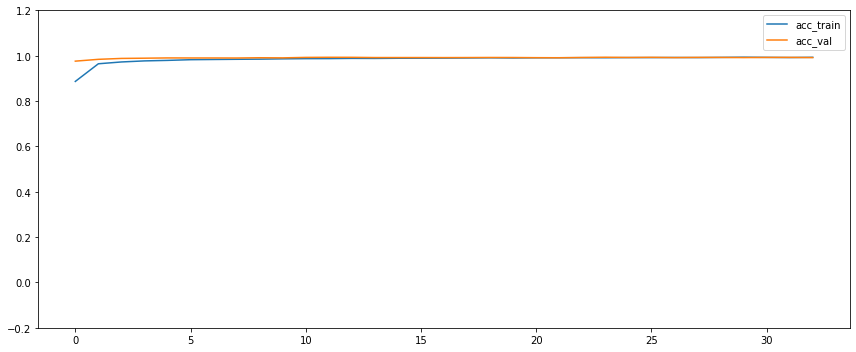

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(results_1.epoch, results_1.history["accuracy"], label="acc_train")
plt.plot(results_1.epoch, results_1.history["val_accuracy"], label="acc_val")

plt.ylim(-0.2, 1.2)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

---